# Methods for recreating a distribution from another distribution

## 1 - Rejection Sampling

In this demo, I show how to simulate a normal distribution from a set of points sampled uniformly using rejection sampling. The general gist of the idea is to reject points with some probability $p$ that is proportional to the probability of that point occurring in the target distribution.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

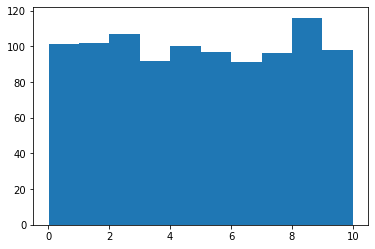

In [20]:
# Generate 1000 random points between 0 and 10
# This represents the data that we actually have.
x = np.random.rand(1000) * 10
plt.hist(x)
plt.show()

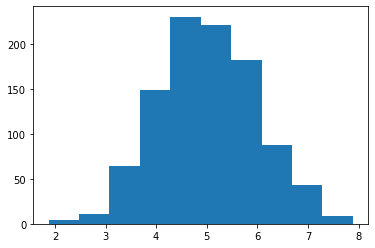

In [21]:
# To get an idea of what our target distribution should look like,
# let's look at a normal distribution.
f_x = np.random.normal(5,1, 1000)
plt.hist(f_x)
plt.show()

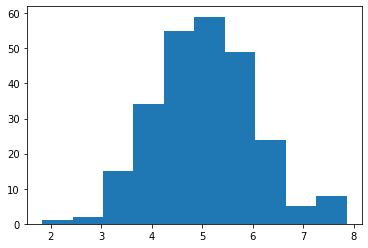

In [23]:
# Let's re-create that target distribution using just the sampled data
# from the uniform distribution.

# First, calculate the mode of the normal distribution.
# This is the point at which the the probability is highest.
# In the case of a normal distribution, this is the same thing
# as the mean.
ceiling = norm.pdf(5,5,1)

# For each of the points, calculate the probability of that
# point being in a normal (5,1) distribution
keep = []
for point in x:
	# Randomly generate a number between 0 and the highest probability.
	prob = np.random.rand() * ceiling

	# Calculate our acceptance ratio.
	accept = norm.pdf(point, 5, 1)

	# If the randomly generated number is less than the acceptance
	# probability, then keep the point.
	if (prob < accept):
		keep.append(point)
	else:
		# We reject that point by not appending it
		# to the list.
		continue

plt.hist(keep)
plt.show()

In [26]:
print(f"The acceptance ratio is {len(keep)/len(x)}.")

The acceptance ratio is 0.252.
